In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import json
from pathlib import Path
import alpaca_trade_api as tradeapi
import requests
import os 
from dotenv import load_dotenv

%matplotlib inline

In [2]:
load_dotenv()

alpaca_api_key = os.getenv("Api_key")
alpaca_secret_key = os.getenv("Secret_Key")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


type(alpaca_api_key)


str

In [3]:
xle_df = api.alpha_vantage.historic_quotes('XLE', adjusted=True, output_format='pandas')


xlf_df = api.alpha_vantage.historic_quotes('XLF', adjusted=True, output_format='pandas')

ive_df = api.alpha_vantage.historic_quotes('IVE', adjusted=True, output_format='pandas')
ive_df.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2000-06-02,62.47,62.59,62.28,62.28,39.9311,10000.0,0.0,1.0
2000-06-01,60.78,61.42,60.69,61.42,39.3797,25400.0,0.0,1.0
2000-05-31,60.19,60.80,60.19,60.50,38.7899,12200.0,0.0,1.0
2000-05-30,59.91,60.22,59.91,60.22,38.6104,1800.0,0.0,1.0
2000-05-26,59.61,59.61,59.31,59.31,38.0269,2900.0,0.0,1.0


In [4]:
xle_df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [5]:
ive_df.columns



Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [6]:
xlf_df.columns


Index(['1. open', '2. high', '3. low', '4. close', '5. adjusted close',
       '6. volume', '7. dividend amount', '8. split coefficient'],
      dtype='object')

In [7]:

xle_df=xle_df['5. adjusted close']
xle_df.head()
xlf_df = xlf_df['5. adjusted close']
xlf_df.head()
ive_df= ive_df ['5. adjusted close']
ive_df.head()



concat_df = pd.concat([xle_df, xlf_df, ive_df], axis = "columns", join = "inner")
concat_df.head()

,5. adjusted close,5. adjusted close,5. adjusted close
date,,,
2020-05-01,35.85,22.06,103.54
2020-04-30,38.00,22.79,106.49
2020-04-29,38.86,23.38,108.70
2020-04-28,36.18,22.72,106.64
2020-04-27,35.37,22.48,106.19


In [8]:
columns = ['XLE close', 'XLF close', 'IVE close']
concat_df.columns = columns
concat_df.head()

,XLE close,XLF close,IVE close
date,,,
2020-05-01,35.85,22.06,103.54
2020-04-30,38.00,22.79,106.49
2020-04-29,38.86,23.38,108.70
2020-04-28,36.18,22.72,106.64
2020-04-27,35.37,22.48,106.19


In [9]:
daily_returns_xle = xle_df.pct_change()
concat_df['XLE_return']= daily_returns_xle 


daily_returns_xlf = xlf_df.pct_change()
concat_df['XLF_return']= daily_returns_xlf 

daily_returns_ive = ive_df.pct_change()
concat_df['IVE_return']= daily_returns_ive 

concat_df.head()

,XLE close,XLF close,IVE close,XLE_return,XLF_return,IVE_return
date,,,,,,
2020-05-01,35.85,22.06,103.54,NaN,NaN,NaN
2020-04-30,38.00,22.79,106.49,0.059972,0.033092,0.028491
2020-04-29,38.86,23.38,108.70,0.022632,0.025889,0.020753
2020-04-28,36.18,22.72,106.64,-0.068966,-0.028229,-0.018951
2020-04-27,35.37,22.48,106.19,-0.022388,-0.010563,-0.004220


In [10]:
concat_df.dropna(inplace=True)

#count nulls again
concat_df.isnull().sum()

XLE close     0
XLF close     0
IVE close     0
XLE_return    0
XLF_return    0
IVE_return    0
dtype: int64

In [11]:
concat_df.drop_duplicates(inplace=True)
concat_df

,XLE close,XLF close,IVE close,XLE_return,XLF_return,IVE_return
date,,,,,,
2020-04-30,38.0000,22.7900,106.4900,0.059972,0.033092,0.028491
2020-04-29,38.8600,23.3800,108.7000,0.022632,0.025889,0.020753
2020-04-28,36.1800,22.7200,106.6400,-0.068966,-0.028229,-0.018951
2020-04-27,35.3700,22.4800,106.1900,-0.022388,-0.010563,-0.004220
2020-04-24,34.6200,21.7400,103.9900,-0.021204,-0.032918,-0.020718
...,...,...,...,...,...,...
2000-06-02,19.6712,14.5807,39.9311,0.014455,0.023164,0.004516
2000-06-01,20.3655,14.0070,39.3797,0.035295,-0.039347,-0.013809
2000-05-31,20.5566,13.5578,38.7899,0.009384,-0.032070,-0.014977


In [12]:
concat_df.dtypes

XLE close     float64
XLF close     float64
IVE close     float64
XLE_return    float64
XLF_return    float64
IVE_return    float64
dtype: object

In [13]:
concat_df.count()


XLE close     5013
XLF close     5013
IVE close     5013
XLE_return    5013
XLF_return    5013
IVE_return    5013
dtype: int64

In [14]:
concat_df.describe()

,XLE close,XLF close,IVE close,XLE_return,XLF_return,IVE_return
count,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000,5013.000000
mean,44.792161,16.684513,60.690082,0.000045,0.000075,-0.000117
std,17.779059,5.466104,26.178638,0.018283,0.018955,0.012926
min,13.110500,4.097100,23.767400,-0.166829,-0.140908,-0.096693
25%,29.468200,12.756900,40.285000,-0.009201,-0.007456,-0.005784
50%,49.699200,16.250000,50.948900,-0.000591,-0.000455,-0.000714
75%,58.900500,19.805800,80.519200,0.008034,0.006622,0.004806
max,81.486300,30.891400,130.626300,0.252212,0.200006,0.125944


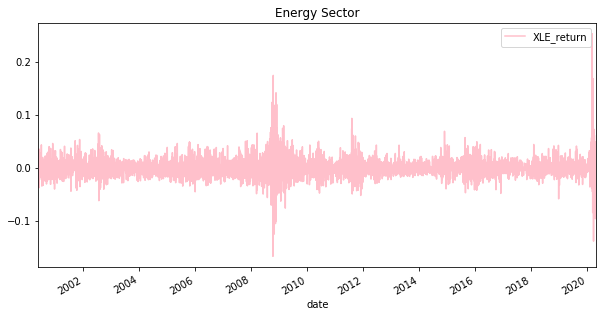

In [15]:
concat_df['XLE_return'].plot(figsize=(10,5), legend= True, title= "Energy Sector", color= "pink")

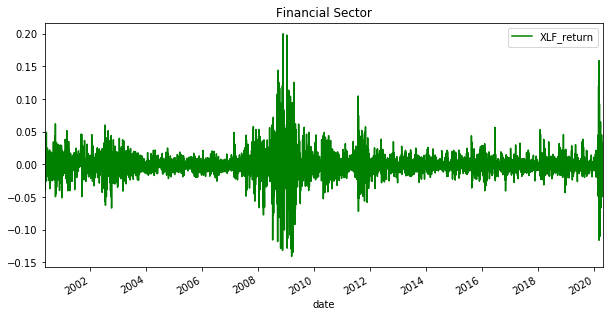

In [16]:
concat_df['XLF_return'].plot(figsize=(10,5), legend= True, title="Financial Sector", color="green")

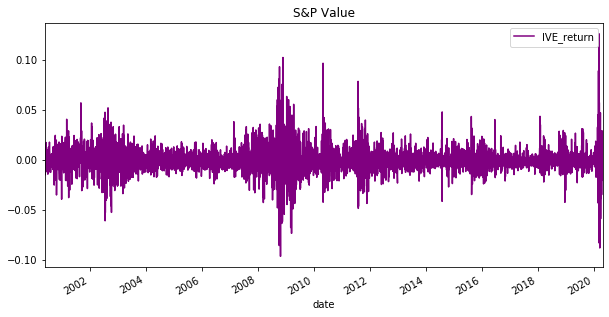

In [17]:
concat_df['IVE_return'].plot(figsize=(10,5), legend= True, title= "S&P Value", color= "purple")

In [18]:

cumulative_returns_xle = (1 + concat_df['XLE_return']).cumprod()
cumulative_returns_xlf = (1 + concat_df['XLF_return']).cumprod()
cumulative_returns_ive =(1+ concat_df['IVE_return']).cumprod()
cumulative_returns_xle.head()

date
2020-04-30    1.059972
2020-04-29    1.083961
2020-04-28    1.009205
2020-04-27    0.986611
2020-04-24    0.965690
Name: XLE_return, dtype: float64

In [19]:
#umulative_returns_xle.rename(columns={'5. adjusted close':'XLE'})
#cumulative_returns_xle

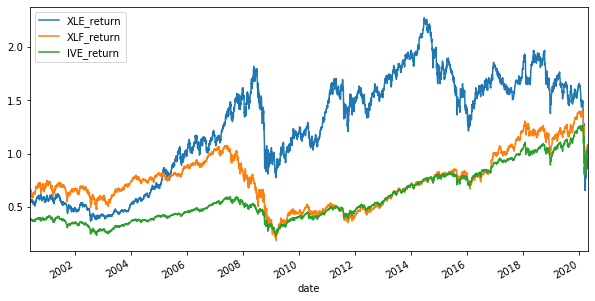

In [20]:
cumulative_returns_xle.plot(figsize=(10,5), legend= True)
cumulative_returns_xlf.plot(figsize=(10,5), legend= True)
cumulative_returns_ive.plot(figsize= (10,5), legend= True)

In [21]:
#need to rename 

In [22]:
xle_std = concat_df['XLE_return'].std()
print(f' XLE standard deviation is {xle_std}')


xlf_std = concat_df['XLF_return'].std()
print(f' XLF standard deviation is {xlf_std}')

ive_std = concat_df['IVE_return'].std()
print(f' IVE standard deviation is {ive_std}')


# Identify the sector with highest standard deviation (riskiest)
sectors = [xle_std, xlf_std, ive_std]
sectors.sort()
print(sectors)

 XLE standard deviation is 0.01828339900689771
 XLF standard deviation is 0.01895501050188839
 IVE standard deviation is 0.012925798532278363
[0.012925798532278363, 0.01828339900689771, 0.01895501050188839]


In [23]:
annualized_xle_std = xle_std * np.sqrt(252)
annualized_xle_std

annualized_xlf_std = xlf_std * np.sqrt(252)
annualized_xlf_std

annualized_ive_std = ive_std * np.sqrt(252)
annualized_ive_std



0.20519069047999344

In [24]:
sectors_std = pd.DataFrame({
    "xle_std": concat_df['XLE_return'],
    "xlf_std": concat_df['XLF_return'],
    "ive_std": concat_df['IVE_return'],
})
sectors_std.rename(columns={"xle_std": "XLE std", "xlf_std": "XLF std", "ive_std": "IVE std"})




,XLE std,XLF std,IVE std
date,,,
2020-04-30,0.059972,0.033092,0.028491
2020-04-29,0.022632,0.025889,0.020753
2020-04-28,-0.068966,-0.028229,-0.018951
2020-04-27,-0.022388,-0.010563,-0.004220
2020-04-24,-0.021204,-0.032918,-0.020718
...,...,...,...
2000-06-02,0.014455,0.023164,0.004516
2000-06-01,0.035295,-0.039347,-0.013809
2000-05-31,0.009384,-0.032070,-0.014977


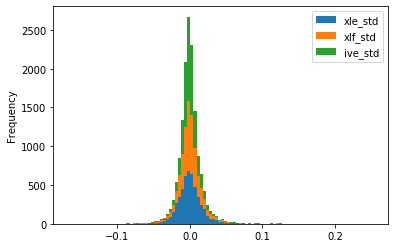

In [25]:
sectors_std.plot.hist(stacked=True, bins=100)

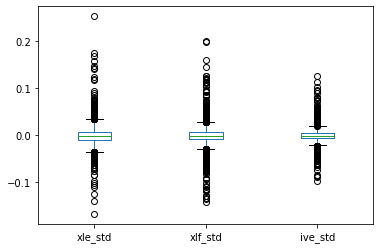

In [26]:
sectors_std.plot.box()

In [27]:
XLE_sharpe_ratio = (concat_df['XLE_return'].mean() * 252) / (concat_df['XLE_return'].std() * np.sqrt(252))

XLF_sharpe_ratio = (concat_df['XLF_return'].mean() * 252) / (concat_df['XLF_return'].std() * np.sqrt(252))

IVE_sharpe_ratio = (concat_df['IVE_return'].mean() * 252) / (concat_df['IVE_return'].std() * np.sqrt(252))


print(f" XLE: {XLE_sharpe_ratio}, XLF: {XLF_sharpe_ratio}, IVE:{IVE_sharpe_ratio}")


 XLE: 0.039460555103316114, XLF: 0.06292343671253378, IVE:-0.14330772832848165


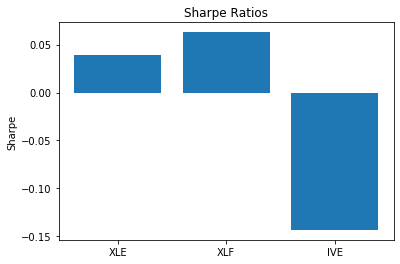

In [28]:
objects = ('XLE', 'XLF', 'IVE')
y_pos = np.arange(len(objects))
sharpe = [XLE_sharpe_ratio,XLF_sharpe_ratio,IVE_sharpe_ratio]

plt.bar(y_pos, sharpe, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('Sharpe')
plt.title('Sharpe Ratios')

plt.show()

In [29]:
returns= concat_df.drop(['XLE close', 'XLF close', "IVE close"], axis=1)

returns.head()

,XLE_return,XLF_return,IVE_return
date,,,
2020-04-30,0.059972,0.033092,0.028491
2020-04-29,0.022632,0.025889,0.020753
2020-04-28,-0.068966,-0.028229,-0.018951
2020-04-27,-0.022388,-0.010563,-0.004220
2020-04-24,-0.021204,-0.032918,-0.020718


In [30]:
correlation=returns.corr()
correlation

,XLE_return,XLF_return,IVE_return
XLE_return,1.000000,0.599633,0.731827
XLF_return,0.599633,1.000000,0.901697
IVE_return,0.731827,0.901697,1.000000


In [31]:
import seaborn as sns


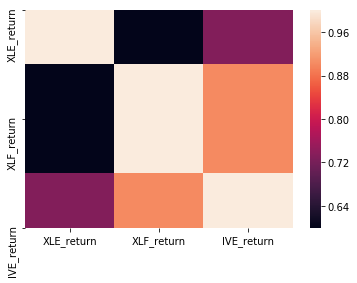

In [32]:
sns.heatmap(correlation)

In [33]:
avg_daily_return_xle = concat_df.mean()['XLE_return']
print(f"The average daily return of XLE is {avg_daily_return_xle}")


avg_daily_return_xlf = concat_df.mean()['XLF_return']
print(f"The average daily return of XLF is {avg_daily_return_xlf}")

avg_daily_return_ive = concat_df.mean()['IVE_return']
print(f"The average daily return of IVE is {avg_daily_return_ive}")

The average daily return of XLE is 4.5448531700011875e-05
The average daily return of XLF is 7.513394517422639e-05
The average daily return of IVE is -0.00011668814177317646


In [34]:
num_simulations = 3000


num_trading_days = 30
XLE_last_price = concat_df['XLE close'][-1]

simulated_prices_XLE_df = pd.DataFrame()

In [35]:
for n in range(num_simulations):
    
    simulated_XLE_prices = [XLE_last_price]
    simulated_XLE_prices

    for i in range(num_trading_days):

    # Calculate the simulated price using the last price within the list
        simulated_price = simulated_XLE_prices[-1] * (1 + np.random.normal(avg_daily_return_xle, xle_std))
        # Append the simulated price to the list
        simulated_XLE_prices.append(simulated_price)

    # Append simulated price of each simulation to DataFrame
    simulated_prices_XLE_df[f"Simulation {n+1}"] = pd.Series(simulated_XLE_prices)

simulated_prices_XLE_df.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 2991,Simulation 2992,Simulation 2993,Simulation 2994,Simulation 2995,Simulation 2996,Simulation 2997,Simulation 2998,Simulation 2999,Simulation 3000
0,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,...,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500,19.677500
1,20.146694,20.006333,19.648634,19.523646,19.682584,20.218409,19.263436,19.235063,19.883968,19.903956,...,19.944744,19.076657,19.612564,19.612095,19.551779,19.844303,19.721529,19.370234,19.821193,19.274151
2,20.627341,20.101614,19.654379,19.302367,19.547250,20.578946,19.184141,19.331676,20.001431,20.189699,...,19.992419,19.752669,19.611811,18.981710,19.626479,20.398800,19.637435,19.260734,19.931731,19.370114
3,20.428281,20.025582,19.383599,19.188816,19.688993,20.235664,19.137036,19.450996,19.575591,20.737339,...,19.870403,20.270805,19.110836,19.587696,19.287480,20.390620,18.785474,19.051692,20.484940,18.961283
4,20.601152,19.890667,19.350889,19.018440,18.864422,20.125878,19.273735,19.967556,19.438561,20.187838,...,19.952413,19.869895,19.300847,19.488421,18.829508,19.678754,18.848648,19.729207,20.145094,18.437828


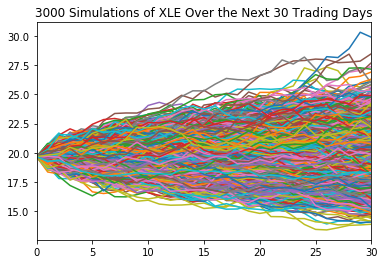

In [37]:
plot_title = f"{n+1} Simulations of XLE Over the Next 30 Trading Days"
simulated_prices_XLE_df.plot(legend=None, title=plot_title)

In [45]:
simulated_ending_prices_XLE = simulated_prices_XLE_df.iloc[-1, :]
confidence_interval= simulated_ending_prices_XLE.quantile(q=[0.025, 0.975])
confidence_interval

0.025    16.004670
0.975    23.985156
Name: 30, dtype: float64

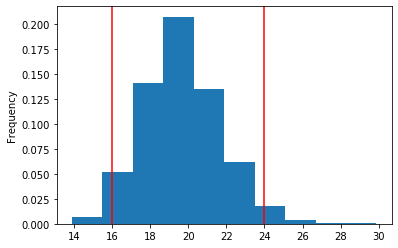

In [46]:
plt.figure();
simulated_ending_prices_XLE.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

In [47]:
initial_investment = 10000

# Calculate cumulative profit/loss of lower and upper bound
cumulative_pnl_lower_bound = initial_investment * ((confidence_interval.iloc[0] - XLE_last_price) / XLE_last_price)
cumulative_pnl_upper_bound = initial_investment * ((confidence_interval.iloc[1] - XLE_last_price) / XLE_last_price)

# Add the initial investment to the cumulative profit/loss of lower and upper bound
ending_investment_lower_bound = initial_investment + cumulative_pnl_lower_bound
ending_investment_upper_bound = initial_investment + cumulative_pnl_upper_bound

# Print the results
print(f"There is a 95% chance that an initial investment of $10,000 in XLE"
      f" over the next 30 trading days will end within in the range of"
      f" ${round(ending_investment_lower_bound,2)} and ${round(ending_investment_upper_bound,2)}")

There is a 95% chance that an initial investment of $10,000 in XLE over the next 30 trading days will end within in the range of $8133.49 and $12189.13
